For my first experimentation into OpenAI Gymnasium environments, I'm going to explore and solve the Taxi environment. Read about the Taxi environment [here](https://gymnasium.farama.org/environments/toy_text/taxi/).

Let's first import and make the environment. 

In [1]:
import gymnasium as gym
import time
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('Taxi-v3', render_mode='ansi')

Let's see how an agent performs under a random policy. 

In [3]:
obs, info = env.reset()

for step in range(100):
    action = env.action_space.sample() # Select an action
    obs, reward, done, truncated, info = env.step(action) # Take the action in the environment and observe results
    if done or truncated:
        break
    print(env.render())
    time.sleep(0.01)

observation space: Discrete(500)
action space: Discrete(6)
<class 'int'>
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B:

Now let's try training using Q-Learning. We should first set up a table of q values, initialise some hyperparameters, and create an epsilon-greedy action selection function:

In [74]:
q_table = np.zeros([env.observation_space.n, env.action_space.n])

def epsilon_greedy(state, epsilon):
    if np.random.uniform() < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(q_table[state])
    
alpha = 0.1
gamma = 0.9
epsilon = 0.1

Now let's set up a loop and train!

In [75]:
# For evaluation
step = 0
steps = []
episodes = []

for episode in range(1, 500):
    state, info = env.reset()
    done = False
    while not done:
        action = epsilon_greedy(state, epsilon)
        next_state, reward, done, truncated, info = env.step(action)

        # Update the q-value
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        q_table[state, action] = alpha * old_value + (1 - alpha) * (reward + gamma * next_max)

        state = next_state
        step += 1
    steps.append(step)
    episodes.append(episode)

Let's see how the number of episodes compares to the number of steps taken - the agent's goal is to transport the passenger as fast as possible, so the faster episodes are completed, the better.

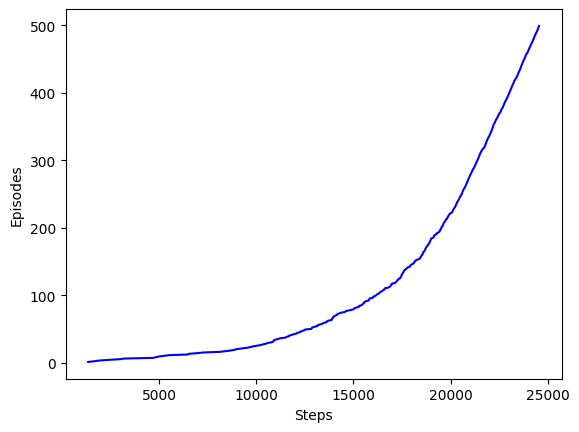

In [76]:
plt.xlabel('Steps')
plt.ylabel('Episodes')

plt.plot(steps, episodes, color='b')
plt.show()